# Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap # install "umap-learn" instead of "umap"

original = pd.read_csv('Data/genelevel_rsem_expectedcounts_byrid.matrix.tsv', sep = '\t', index_col = [0])
original = original.transpose()
original.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283690,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699
1_2,347.0,2.0,602.0,826.00,572.0,47.0,427.17,221.0,789.0,1591.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
100_2,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,757.0,...,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
101_3,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,872.0,...,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
102_2,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,643.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
103_3,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,698.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [2]:
original.shape

(523, 58051)

In [3]:
cleaned = pd.read_csv('Data/batchcorrected_log2cpm.tsv', sep = '\t', index_col = [0])
cleaned = cleaned.transpose()
cleaned.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
100_2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,5.504096,5.377653,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
101_3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,5.846664,5.255156,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
102_2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,5.788883,5.145699,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
103_3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,5.687792,5.140274,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
104_2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,5.646700,5.069410,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


In [4]:
cleaned.shape

(453, 18053)

# Basic Visualization

In [5]:
# Divide original data into 4 group according to AMD stages
original_stage1 = original[original.index.str.contains('_1')]
original_stage2 = original[original.index.str.contains('_2')]
original_stage3 = original[original.index.str.contains('_3')]
original_stage4 = original[original.index.str.contains('_4')]
X = np.vstack([original_stage1, original_stage2, original_stage3, original_stage4])

label_stage1 = np.zeros(len(original_stage1))
label_stage2 = np.ones(len(original_stage2))
label_stage3 = np.full(len(original_stage3), 2)
label_stage4 = np.full(len(original_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

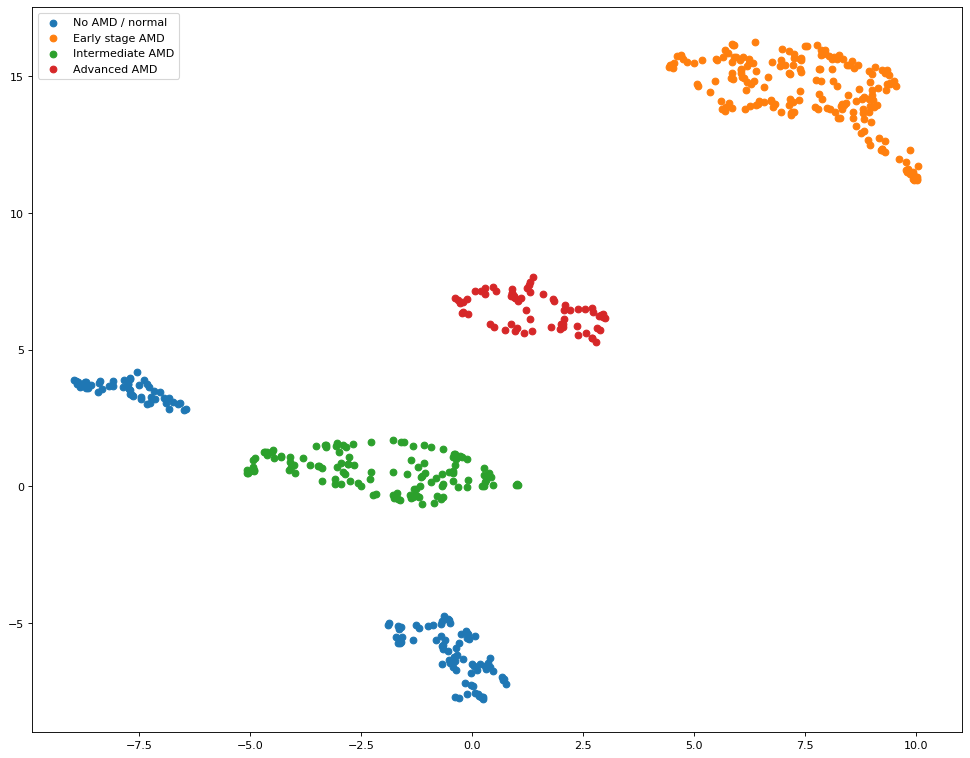

In [6]:
# Default parameters: 
#     n_components = 2 (The dimension of the space to embed into)
#     n_neighbors = 15 (The size of local neighborhood, global v.s. local)
#     min_dist = 0.1 (The effective minimum distance between embedded points, degree of tightness)
#     metric = 'euclidean' (The metric to use to compute distances in high dimensional space)

# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

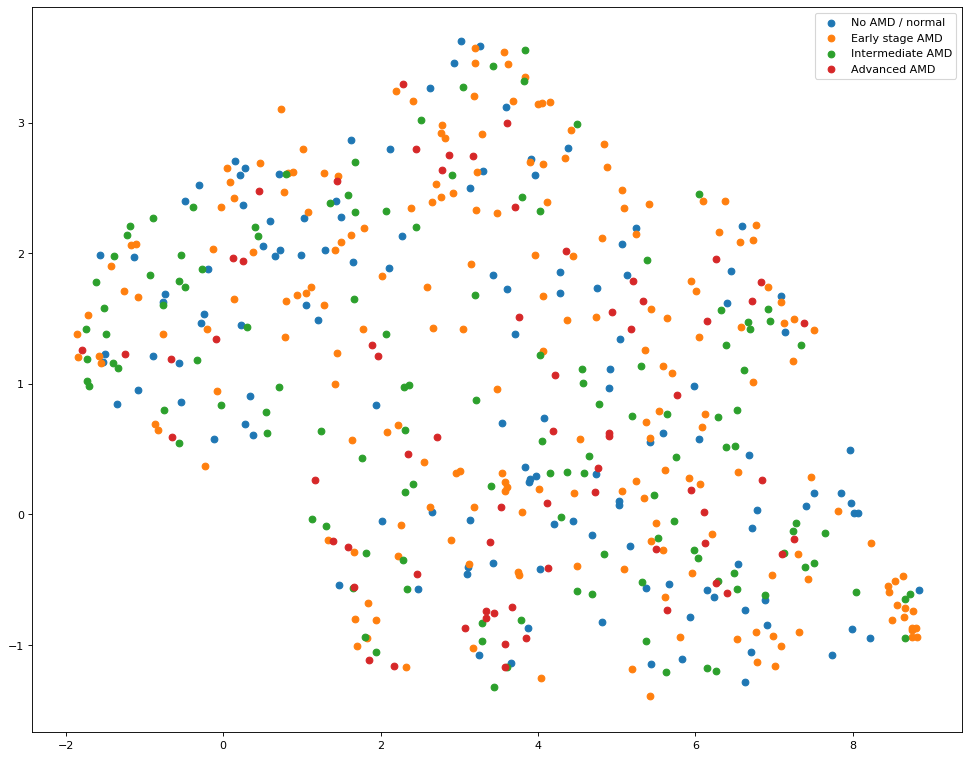

In [7]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

In [8]:
# Divide cleaned data into 4 group according to AMD stages
cleaned_stage1 = cleaned[cleaned.index.str.contains('_1')]
cleaned_stage2 = cleaned[cleaned.index.str.contains('_2')]
cleaned_stage3 = cleaned[cleaned.index.str.contains('_3')]
cleaned_stage4 = cleaned[cleaned.index.str.contains('_4')]
X = np.vstack([cleaned_stage1, cleaned_stage2, cleaned_stage3, cleaned_stage4])

label_stage1 = np.zeros(len(cleaned_stage1))
label_stage2 = np.ones(len(cleaned_stage2))
label_stage3 = np.full(len(cleaned_stage3), 2)
label_stage4 = np.full(len(cleaned_stage4), 3)
y = np.concatenate([label_stage1, label_stage2, label_stage3, label_stage4])

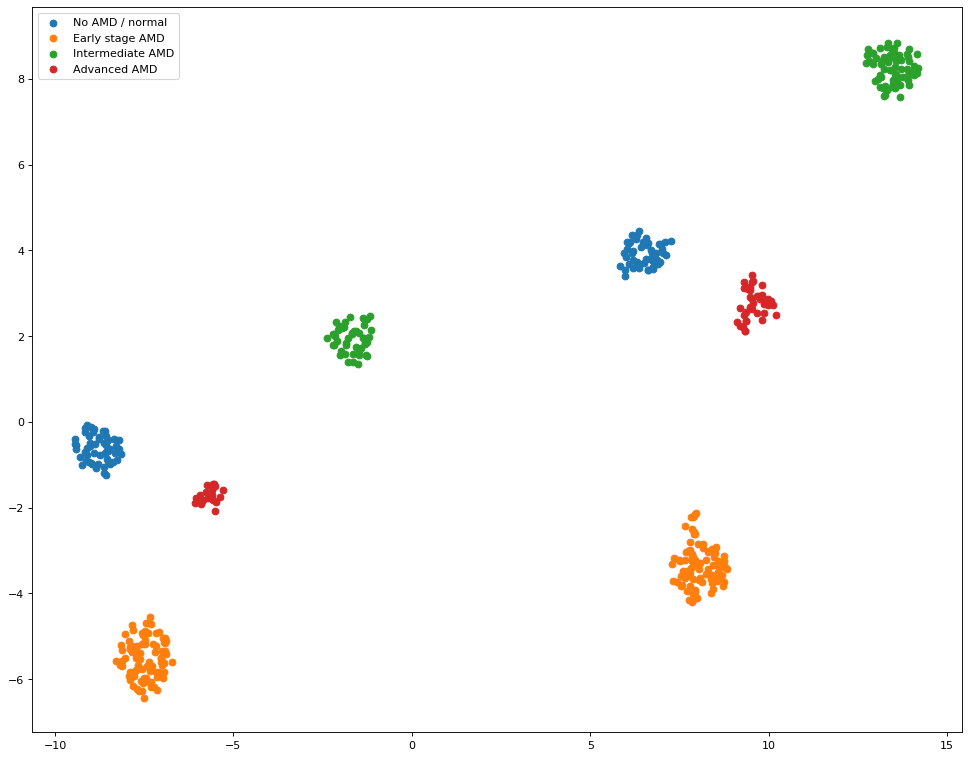

In [9]:
# Ideal case where correct classification (target array) is provided
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X, y)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()

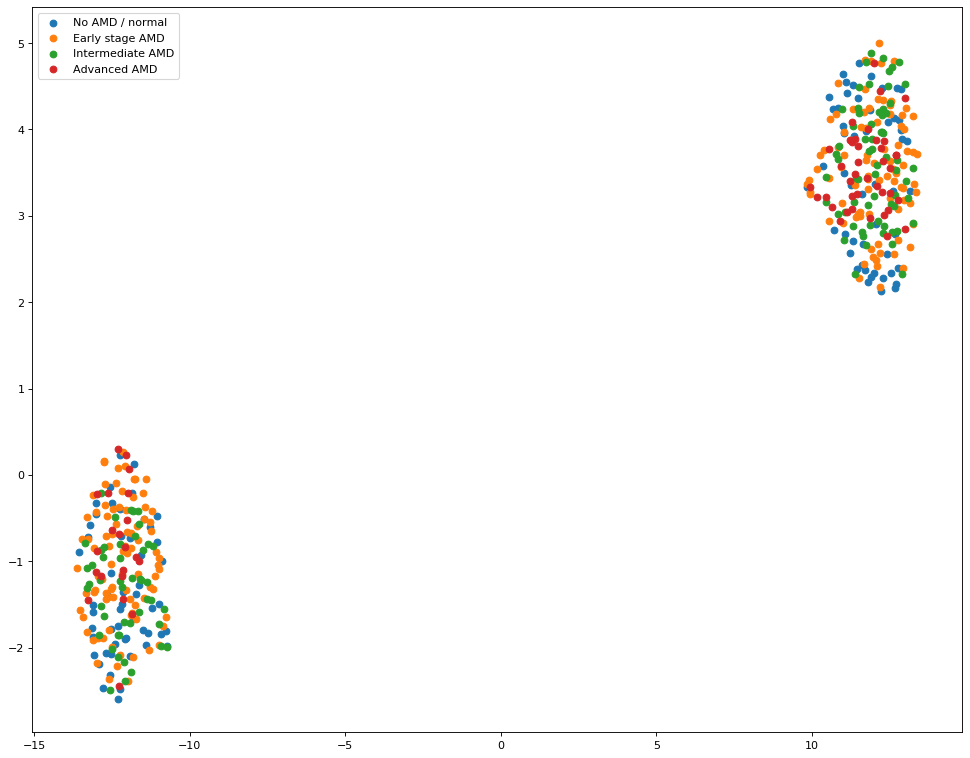

In [10]:
# Actual case where no classification is provided
X_embedded = umap.UMAP(
    n_components = 2,
    n_neighbors = 30,
    min_dist = 0.2,
    metric = 'euclidean'
).fit_transform(X)

fig, ax = plt.subplots(figsize = (15, 12), dpi = 80, facecolor = 'w', edgecolor = 'k')
pc1 = ax.scatter(X_embedded[y == 0, 0], X_embedded[y == 0, 1], label = 'No AMD / normal')
pc2 = ax.scatter(X_embedded[y == 1, 0], X_embedded[y == 1, 1], label = 'Early stage AMD')
pc3 = ax.scatter(X_embedded[y == 2, 0], X_embedded[y == 2, 1], label = 'Intermediate AMD')
pc4 = ax.scatter(X_embedded[y == 3, 0], X_embedded[y == 3, 1], label = 'Advanced AMD')
ax.legend()
plt.show()